<a href="https://colab.research.google.com/github/zhueric2004/quant-assessment/blob/main/ConsumerComplaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from google.colab import drive

In [14]:
def frequencyToDataframe(df, column):
  return df[column].value_counts().to_frame()

In [16]:
def merge(shapefile, dataset, column):
  return shapefile.merge(dataset, on=column)

In [10]:
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Quant/consumer_complaints.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
states = gpd.read_file("/content/drive/MyDrive/Quant/tl_2021_us_state/tl_2021_us_state.shp") 
zipCodes = gpd.read_file("/content/drive/MyDrive/Quant/tl_2019_us_zcta510/tl_2019_us_zcta510.shp") 

In [12]:
data.drop(['consumer_complaint_narrative','company_public_response','consumer_consent_provided','complaint_id'], axis = 1, inplace = True)

(10.0, 80.0)

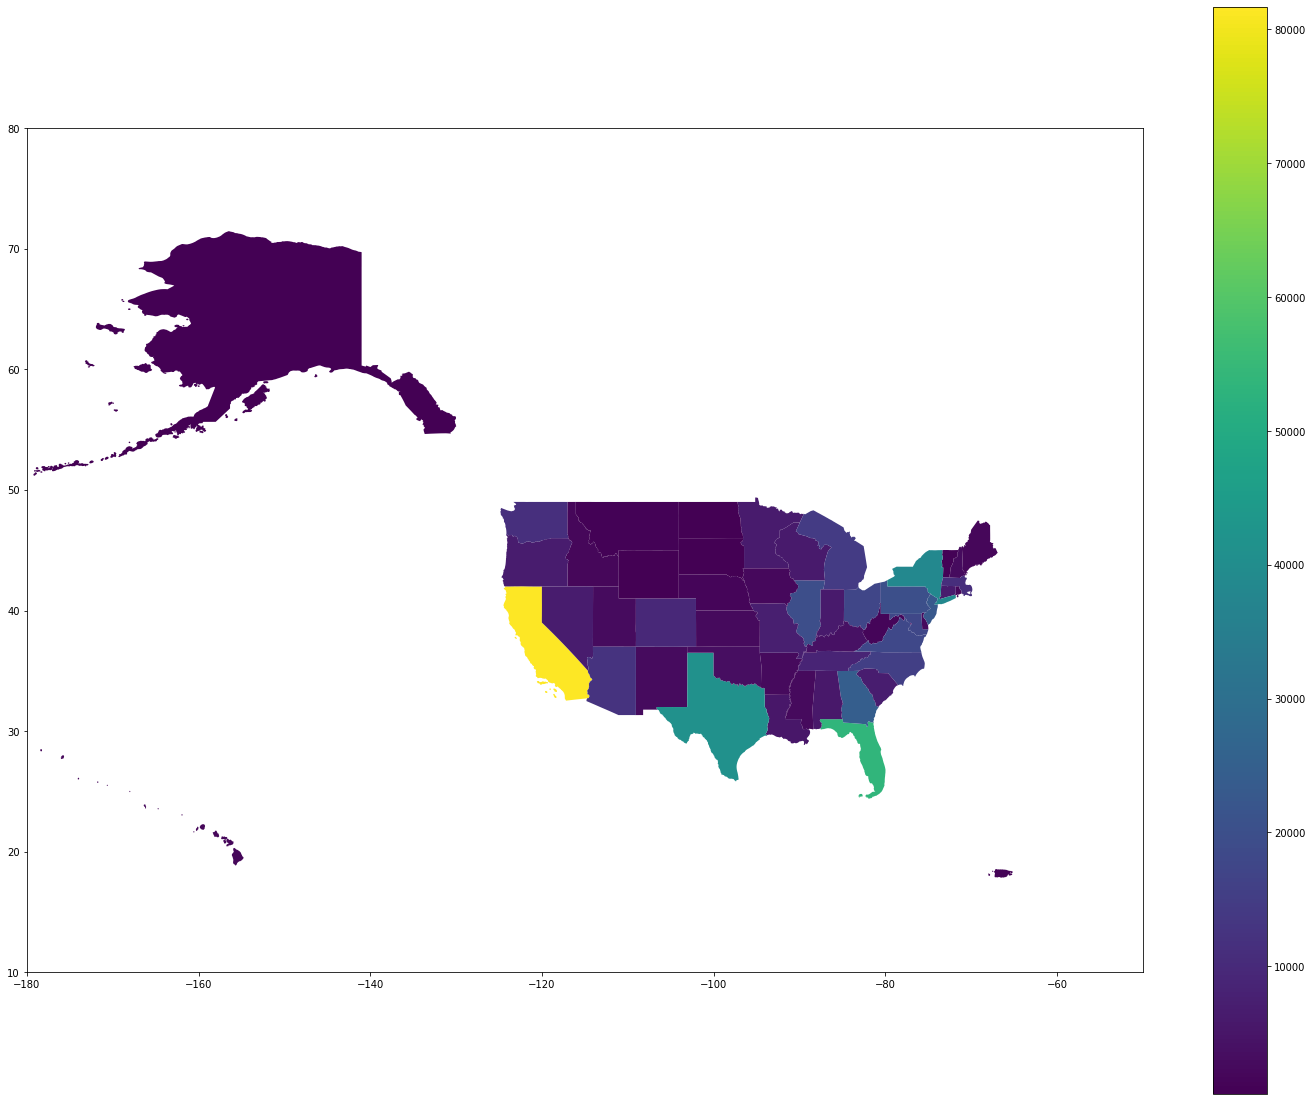

In [47]:
stateFreq = frequencyToDataframe(data, 'state')
stateFreq.index.names = ['STUSPS']
stateMap = merge(states, stateFreq, 'STUSPS')
stateMap = stateMap.drop([34,35,36,41])
fig, ax = plt.subplots(figsize=(25, 20))
stateMap.plot(column='state', legend = True, ax = ax);
ax.set_xlim(-180, -50)
ax.set_ylim(10, 80)